In [1]:
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

sns.set(style='whitegrid', context='notebook')

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
data = mnist['data'].values
target = mnist['target'].values

In [4]:
some_digit = data[3_000]

(-0.5, 27.5, 27.5, -0.5)

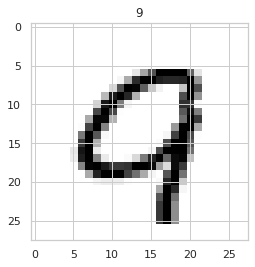

In [5]:
plt.imshow(some_digit.reshape((28, 28)), cmap=matplotlib.cm.binary, interpolation='nearest');
plt.title(target[3_000])
plt.axis()

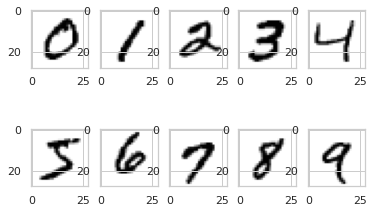

In [6]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(target == f"{i}")[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [7]:
X_train, X_test, y_train, y_test = data[:60_000], data[60_000:], target[:60_000], target[60_000:]

# Бинарная классификация

In [8]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [9]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [10]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
# sgd_clf = SGDClassifier(random_state=42, max_iter=1_000, penalty='l1', alpha=.1, learning_rate='optimal')
# sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
pd.DataFrame(np.concatenate([y_train_5]), columns=['train']).value_counts()

train
False    54579
True      5421
dtype: int64

In [12]:
5421/54579 * 100

9.932391579178805

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_train_5, sgd_clf.predict(X_train))

0.9522666666666667

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [ ]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    X_test_folds = X_train[test_index]    
    y_train_folds = y_train_5[train_index]    
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    
    print(accuracy_score(y_test_folds, y_pred))

In [87]:
from sklearn.model_selection import cross_val_score

In [82]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_train_5, sgd_clf.predict(X_train))

array([[52316,  2263],
       [  601,  4820]])

In [17]:
from sklearn.model_selection import cross_val_predict

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/doc/env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/doc/env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/doc/env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [108]:
confusion_matrix(y_train_5, y_train_pred)

array([[52926,  1653],
       [ 1739,  3682]])

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

In [93]:
precision_score(y_train_5, y_train_pred)

0.6901593252108716

In [95]:
recall_score(y_train_5, y_train_pred)

0.6792104777716288

In [96]:
1739/(1739+3682)

0.32078952222837115

In [99]:
tn, fp, fn, tp = confusion_matrix(y_train_5, y_train_pred).ravel()

In [102]:
tp/sum([tp, fp])

0.6901593252108716

In [107]:
dict(tn=tn, fp=fp, fn=fn, tp=tp)

{'tn': 52926, 'fp': 1653, 'fn': 1739, 'tp': 3682}

In [20]:
from sklearn.model_selection import cross_val_predict

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [23]:
from sklearn.metrics import precision_recall_curve

In [24]:
precisions, racalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [66]:
def plot_precision_recall_vs_thresholds(pr, rec, thres):
    plt.plot(thres, pr[:-1], 'r--', label='Точность');
    plt.plot(thres, rec[:-1], 'y--', label='Полнота');
    
    plt.xlabel('Порог')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.xlim([-20_000, 20_000])

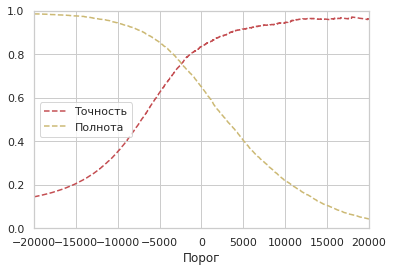

In [67]:
plot_precision_recall_vs_thresholds(precisions, racalls, thresholds)

Text(0, 0.5, 'Точность')

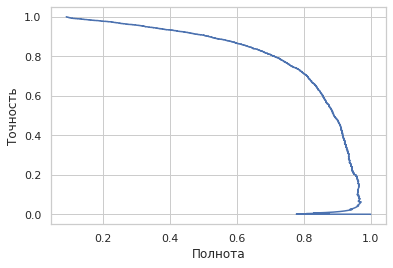

In [57]:
plt.plot(precisions, racalls)
plt.xlabel('Полнота')
plt.ylabel('Точность')

In [61]:
from sklearn.metrics import recall_score, precision_score

In [68]:
recall_score(y_train_5, y_scores>-25_00)

0.762589928057554

In [69]:
precision_score(y_train_5, y_scores>25_00)

0.886199308393587